## Aircraft Detection - Deep Learning Project

In [28]:
import os
import json
import random
import pandas as pd
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [29]:
data_root = r"D:\RarePlanes\data"
train_imgs = os.path.join(data_root, 'train')
annot_dir = os.path.join(data_root, r'annot\rareplanes.json')

train_im_list = [z for z in os.listdir(train_imgs) if z.endswith('.png')]
f = open(annot_dir)
data = json.load(f)
assert len(train_im_list) == len(data['images'])

def imgs_annot_aggregator(iter):
    print("Running imgs_annot_aggregator...")
    final = np.zeros((iter,4))
    bounding_boxes = []
    image_names = []
    instances_img = []
    amount_matches = []
    for j in range(iter): 
        instances_img = []                        
        img = random.sample(train_im_list,1)
        image_names.append(img)
        for i in range(len(data['categories'])):
            if [data['categories'][i]['image_fname']] == img:
                instances_img.append(data['categories'][i]['id'])
        for l in range(len(instances_img)):
            for i in range(len(data['categories'])):
                if data['categories'][i]['id'] == instances_img[l]:
                    bounding_boxes.append(data['categories'][i]['bbox'])
        amount_matches.append(len(instances_img))
    final = amount_matches, image_names, bounding_boxes
    return final, image_names

def bbox_points(data_annot):
    print("Running bbox_points...")
    name = []
    x_org = []
    y_org = []
    x_dist = []
    y_dist = []
    itr = 0
    for i in range(len(data_annot[0])):
        for j in range(data_annot[0][i]):
            name.append(data_annot[1][i])
            x_org.append(data_annot[2][j+itr][0])
            y_org.append(data_annot[2][j+itr][1])
            x_dist.append(data_annot[2][j+itr][2])
            y_dist.append(data_annot[2][j+itr][3])
        itr = itr + data_annot[0][i]

    df = pd.DataFrame(
    {'name': name,
     'x_org': x_org,
     'y_org': y_org,
     'x_dist': x_dist,
     'y_dist': y_dist
    })
    return df


## Testing random images

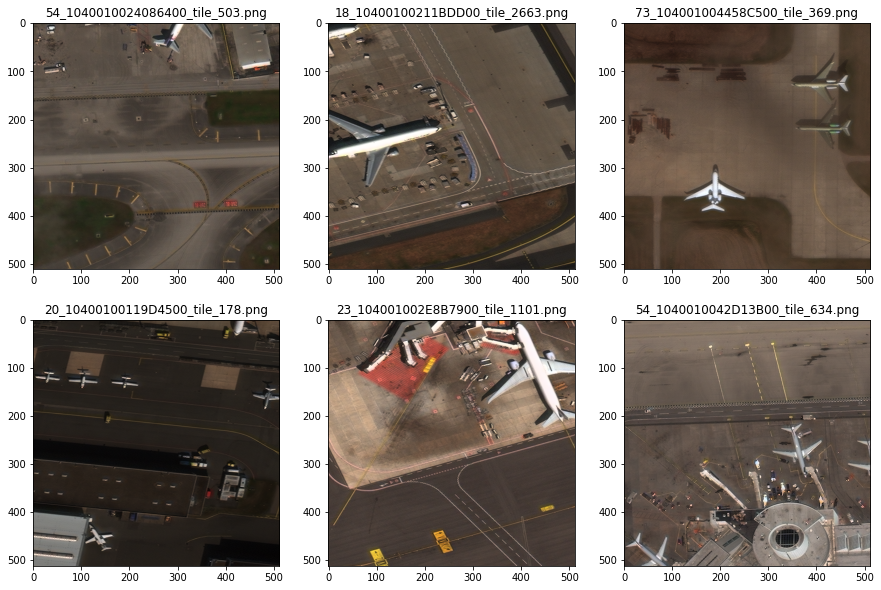

In [31]:
dir_tmp = train_imgs
rows, cols = 2, 3
figsize = 5
rand_selection = random.sample(train_im_list, rows*cols)
fig, axes = plt.subplots(nrows=rows, ncols=cols,  figsize=(figsize*cols, figsize*rows))
for i in range(rows*cols):
    ax = axes.flatten()[i]
    im_path_tmp = os.path.join(train_imgs, rand_selection[i])
    im_name_tmp = os.path.basename(im_path_tmp)
    im = skimage.io.imread(im_path_tmp)
    ax.imshow(im)
    ax.set_title(im_name_tmp)

## Testing random images + bounding boxes

Running imgs_annot_aggregator...
Running bbox_points...


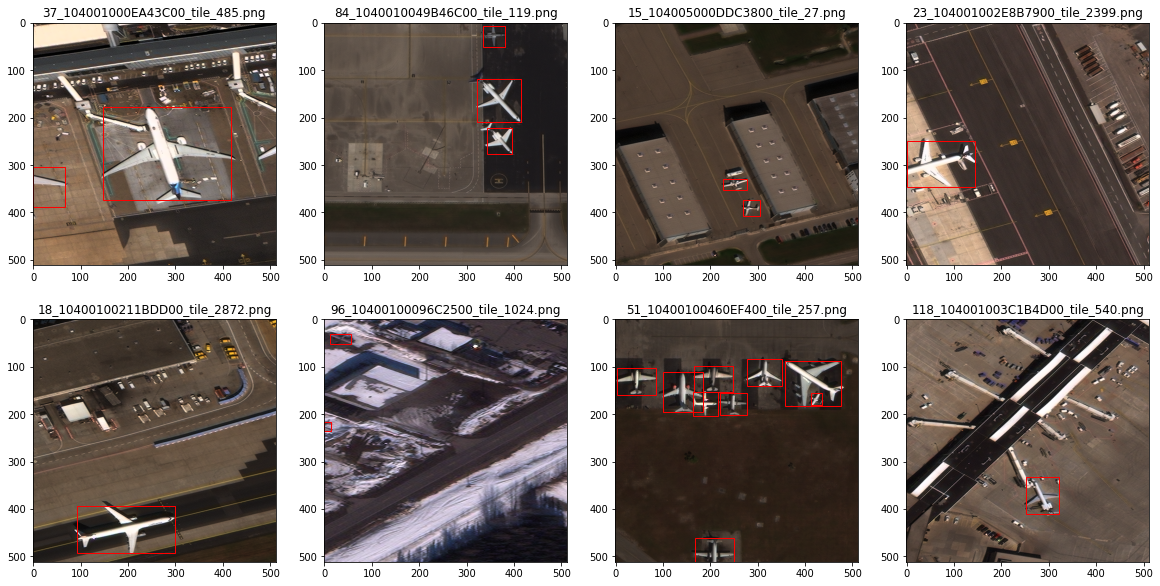

In [32]:
dir_tmp = train_imgs
rows, cols = 2,4
figsize = 5
final, img_name = imgs_annot_aggregator(rows*cols)
result = bbox_points(final)

fig, axes = plt.subplots(nrows=rows, ncols=cols,  figsize=(figsize*cols, figsize*rows))
for i in range(rows*cols):
    ax = axes.flatten()[i]
    for j in range(len(result.name)):
        if result.name[j] == img_name[i]:
            rect = patches.Rectangle((result.x_org[j], result.y_org[j]), 
            result.x_dist[j],result.y_dist[j], linewidth=1, edgecolor='r', facecolor='none')    
            ax.add_patch(rect)
    im_path_tmp = os.path.join(train_imgs, str(img_name[i][0]))
    im_name_tmp = os.path.basename(im_path_tmp)
    im = skimage.io.imread(im_path_tmp)
    ax.imshow(im)
    ax.set_title(im_name_tmp)